In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 用sklearn 产生数据
from sklearn.datasets import make_blobs
std = np.array([1.9,2.5,2.2,2.3,1.6])
n_clusters = np.size(std)
X,y = make_blobs(n_samples=3000, n_features=2, centers=n_clusters, cluster_std=std, random_state=10)
labels = np.unique(y)
labels

array([0, 1, 2, 3, 4])

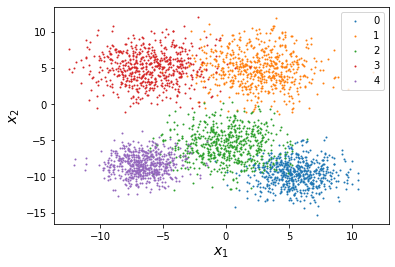

In [2]:
# 展示数据
def plot_clusters(X, y=None, labels=None):
    if (y is not None and labels is not None):
        for label in labels:
            plt.scatter(X[:,0][y==label], X[:,1][y==label], s=1, label=label)
    else:
        plt.scatter(X[:,0], X[:,1], s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    plt.legend()
plot_clusters(X,y,labels)
plt.show()

In [3]:
# 训练
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters,random_state=1)
y_pre = kmeans.fit_predict(X)

In [4]:
kmeans.labels_, y_pre

(array([0, 0, 2, ..., 3, 3, 1], dtype=int32),
 array([0, 0, 2, ..., 3, 3, 1], dtype=int32))

In [5]:
# 预测
X_new = np.array([[-12,-8],[-8,-8],[-6,-4],[-2,0],[0,5]])
y_new_pre = kmeans.predict(X_new)
y_new_pre

array([0, 0, 0, 4, 1], dtype=int32)

In [6]:
# 绘图函数

def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)
    
def plot_centroids(centroids,circle_color='w',cross_color='r'):
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',s=60,linewidths=8,
                color=circle_color,alpha=0.5,zorder=10)
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,linewidths=3,
                color=cross_color,alpha=1,zorder=11)

    # 绘制决策边界
def plot_dec_bod(clusterer, X, resol=1000, show_centeroids=True):
    mins = X.min(axis=0)-0.1
    maxs = X.max(axis=0)-0.1
    xx, yy = np.meshgrid(np.linspace(mins[0],maxs[0],resol),
                        np.linspace(mins[1],maxs[1],resol))
    xy = np.c_[xx.flatten(), yy.flatten()]
#     print(xx[-10:-1])
    Z = clusterer.predict(xy).reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap='Pastel2')
    plt.contour(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1, colors='k')
    
    if show_centeroids:
        plot_centroids(clusterer.cluster_centers_)
    
    plt.axis([mins[0],maxs[0],mins[1],maxs[1]])
    
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    #plt.legend()

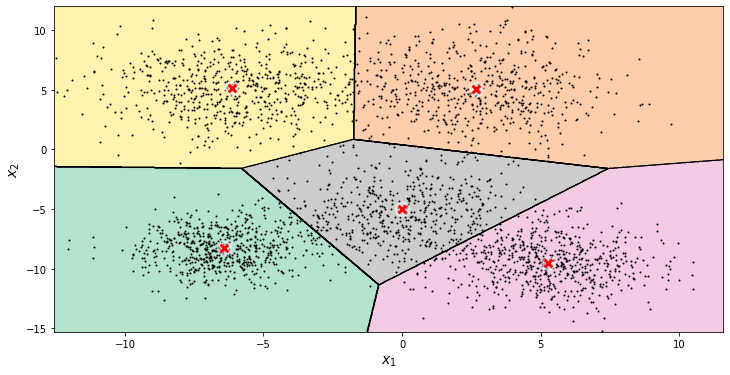

In [7]:
# 绘图
plt.figure(figsize=(12,6))
plot_data(X)
plot_dec_bod(kmeans, X)
plt.show()

## 算法流程

In [8]:
# n_init: 训练的次数，取最优结果
kmeans_iters1 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=1, random_state=13)
kmeans_iters2 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=2, random_state=13)
kmeans_iters3 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=3, random_state=13)
kmeans_iters4 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=4, random_state=13)
kmeans_iters1.fit(X)
kmeans_iters2.fit(X)
kmeans_iters3.fit(X)
kmeans_iters4.fit(X)

KMeans(init='random', max_iter=4, n_clusters=5, n_init=1, random_state=13)

Text(0.5, 1.0, 'inertia_ is 44892.44799756256')

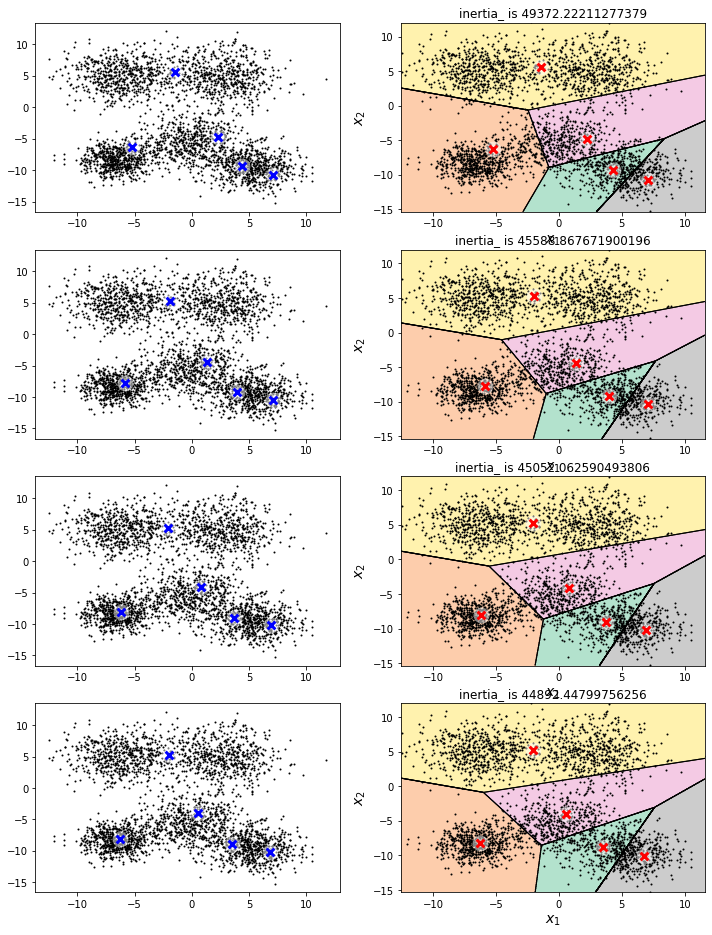

In [9]:
plt.figure(figsize=(12,16))
plt.subplot(421)
plot_data(X)
plot_centroids(kmeans_iters1.cluster_centers_,'w','b')
plt.subplot(422)
plot_data(X)
plot_dec_bod(kmeans_iters1, X)
plt.title(f"inertia_ is {kmeans_iters1.inertia_}")

plt.subplot(423)
plot_data(X)
plot_centroids(kmeans_iters2.cluster_centers_,'w','b')
plt.subplot(424)
plot_data(X)
plot_dec_bod(kmeans_iters2, X)
plt.title(f"inertia_ is {kmeans_iters2.inertia_}")

plt.subplot(425)
plot_data(X)
plot_centroids(kmeans_iters3.cluster_centers_,'w','b')
plt.subplot(426)
plot_data(X)
plot_dec_bod(kmeans_iters3, X)
plt.title(f"inertia_ is {kmeans_iters3.inertia_}")

plt.subplot(427)
plot_data(X)
plot_centroids(kmeans_iters4.cluster_centers_,'w','b')
plt.subplot(428)
plot_data(X)
plot_dec_bod(kmeans_iters4, X)
plt.title(f"inertia_ is {kmeans_iters4.inertia_}")

## 结果的不稳定性

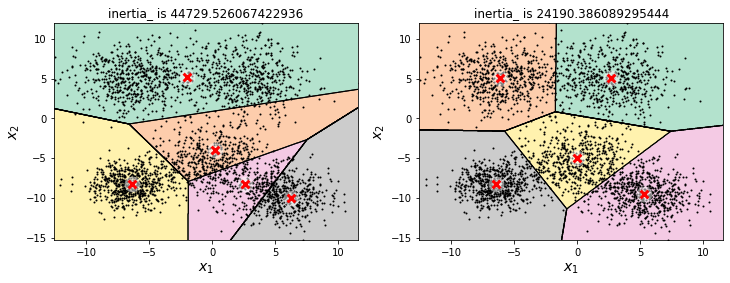

In [10]:
def plot_clusters_comparison(c1,c2,X):
    c1.fit(X)
    c2.fit(X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_data(X)
    plot_dec_bod(c1, X)
    plt.title(f"inertia_ is {c1.inertia_}")
    
    plt.subplot(122)
    plot_data(X)
    plot_dec_bod(c2, X)
    plt.title(f"inertia_ is {c2.inertia_}")
    
c1 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=100, random_state=3)
c2 = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=100, random_state=23)
plot_clusters_comparison(c1,c2,X)

## inertia

In [11]:
inertia = c2.inertia_
score = c2.score(X)
inertia,score

(24190.386089295444, -24190.386089295444)

In [12]:
X_dist = c2.transform(X)
X_dist[:3]

array([[17.17753013, 15.00032725, 11.08308701,  7.54820923,  1.72356521],
       [16.08408025, 13.08467706, 12.15341114,  7.36665175,  0.47028227],
       [16.39636097, 21.15600364,  3.15609402,  9.87790617, 14.90378158]])

In [13]:
X_closest_dist = X_dist[np.arange(X_dist.shape[0]), c2.labels_]

In [14]:
np.sum(X_closest_dist ** 2)

24190.386089295433

## 找到最佳的簇数  
簇数越多，inertia越小

Text(0, 0.5, 'inertia')

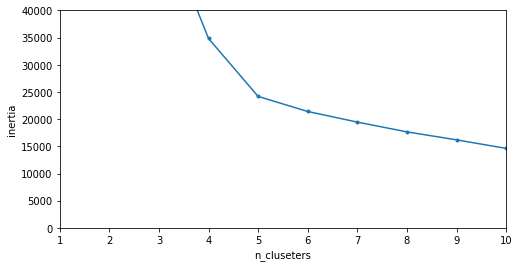

In [15]:
# 拐点的簇数可能是合适的
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1,11)]
inertias = [k.inertia_ for k in kmeans_per_k]

plt.figure(figsize=(8,4))
plt.plot(range(1,len(inertias)+1),inertias,'.-')
plt.axis([1,10,0,40000])
plt.xlabel("n_cluseters")
plt.ylabel("inertia")

## 轮廓系数

Text(0, 0.5, 'silhouette_score')

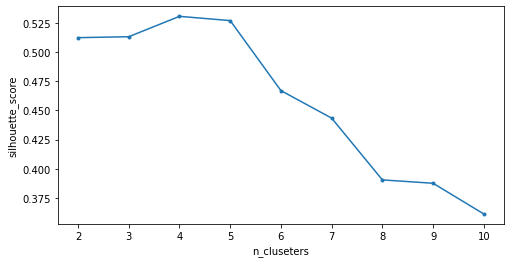

In [17]:
from sklearn.metrics import silhouette_score
silhouette = [silhouette_score(X, k.labels_) for k in kmeans_per_k[1:]]

plt.figure(figsize=(8,4))
plt.plot(range(2,11),silhouette,'.-')
plt.xlabel("n_cluseters")
plt.ylabel("silhouette_score")

## KMeans 存在的问题
用 inertia 或者 silhouette 评估有时候并不准确

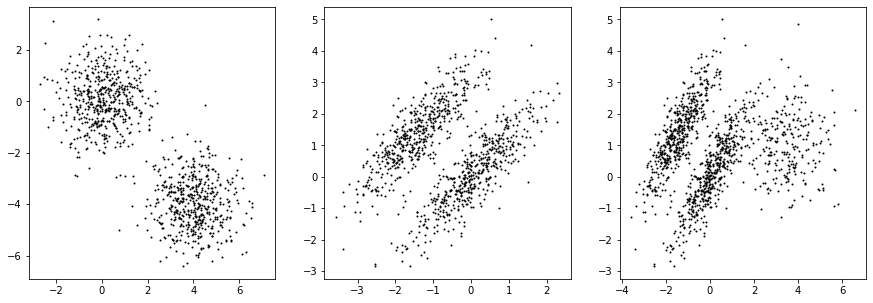

In [94]:
X1_,y1 = make_blobs(n_samples=1000, n_features=2, centers=np.array([[4,-4],[0,0]]), random_state=42)
X1 = X1_.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250, n_features=2, centers=1, random_state=42)
X2 = X2 + [6,-8]

X = np.r_[X1,X2]
y = np.r_[y1,y2]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_data(X1_)
plt.subplot(1,3,2)
plot_data(X1)

plt.subplot(1,3,3)
plot_data(X)

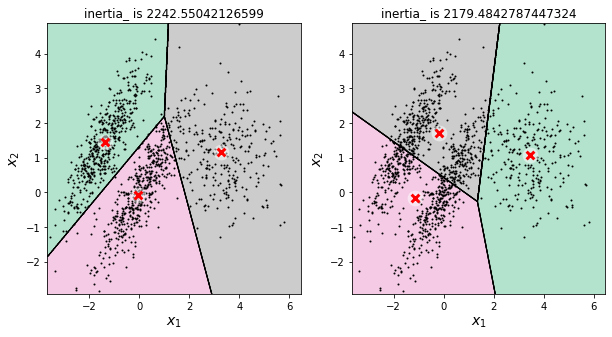

In [96]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5,2.5],[0.5,0],[4,0]]), 
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)
# 绘图
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_data(X)
plot_dec_bod(kmeans_good, X)
plt.title(f"inertia_ is {kmeans_good.inertia_}")

plt.subplot(1,2,2)
plot_data(X)
plot_dec_bod(kmeans_bad, X)
plt.title(f"inertia_ is {kmeans_bad.inertia_}")
plt.show()